# author: Hilda Sandström, Oct. 2023

# Collecting statistics on occurance of MACCS keys in a molecular dataset

## Import  modules

In [1]:
import sys
import os 
import numpy as np
import pandas as pd
sys.path.append('../scripts/fps/')
sys.path.append('../scripts/aprl_ssp/')
from fingerprints import MACCSAnalysis

## Load dataset

In [2]:
data = pd.read_csv('../data/validation/apinenemech.csv')
data.columns

Index(['compound', 'SMILES'], dtype='object')

## Get MACCS fingerprints for whole dataset

In [3]:
maccs_data = MACCSAnalysis(data)

## Gather some statistics on MACCS key frequencies

In [4]:
percentages  = np.linspace(0,1,5)
feature_counts, nz_features = maccs_data.get_counts()
shared_features = maccs_data.shared_features(nz_features, percentages)

## Plot how many features (keys) appear in x percent of dataset

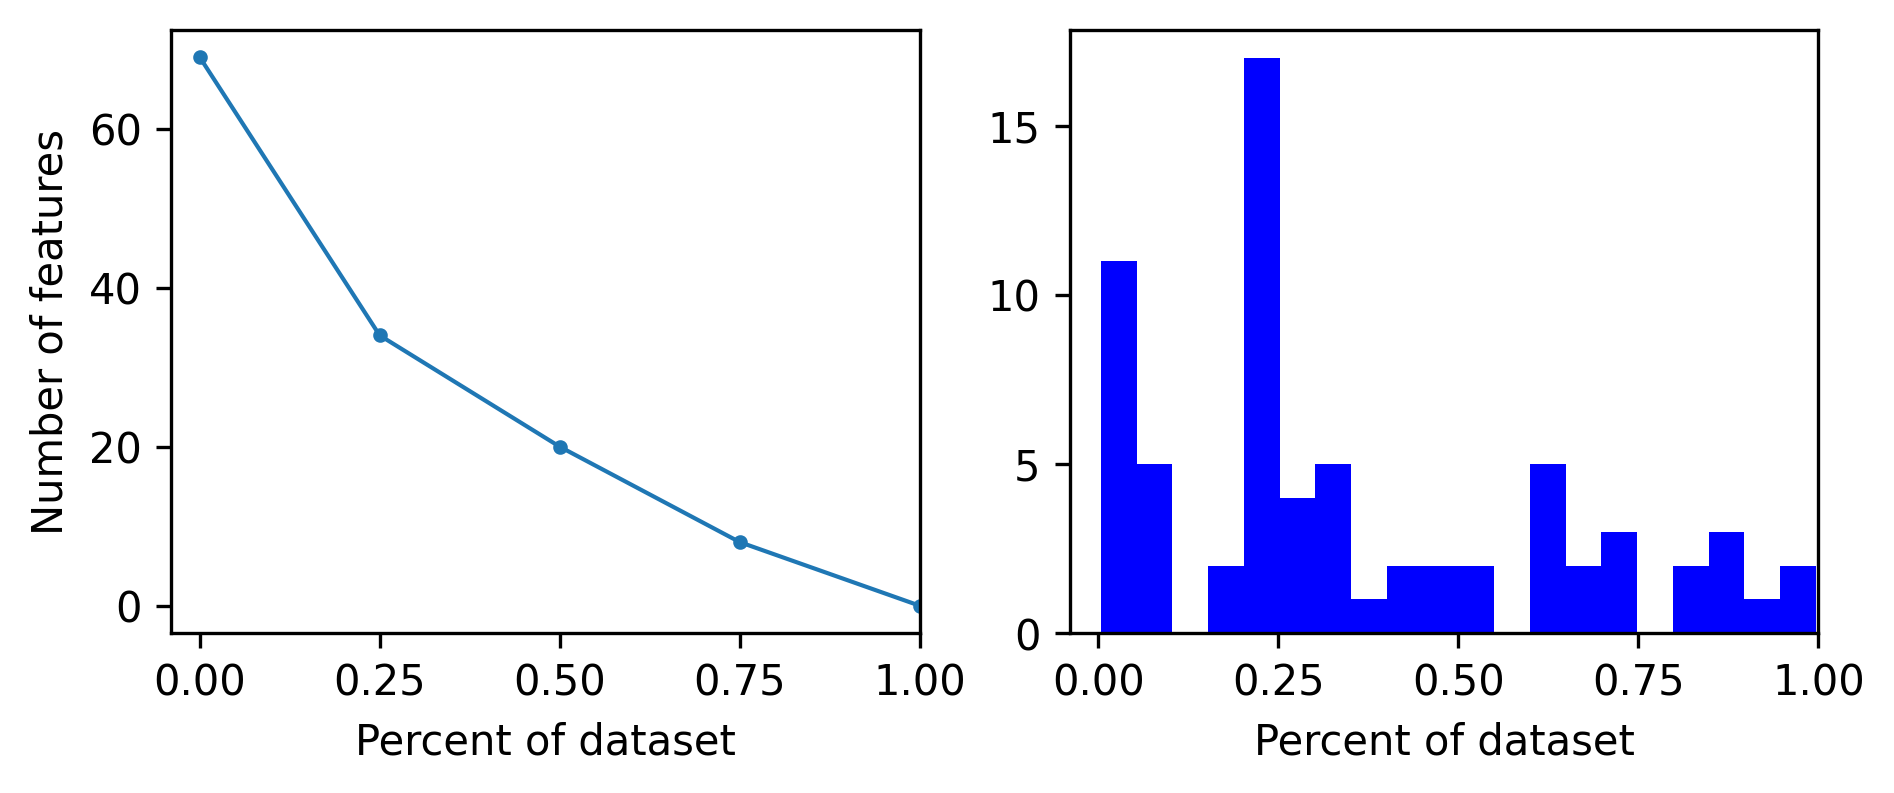

In [5]:
maccs_data.plot_feature_distribution(shared_features, nz_features, percentages, '../reports/figures/test')

## Plot in how much of data set each key appears

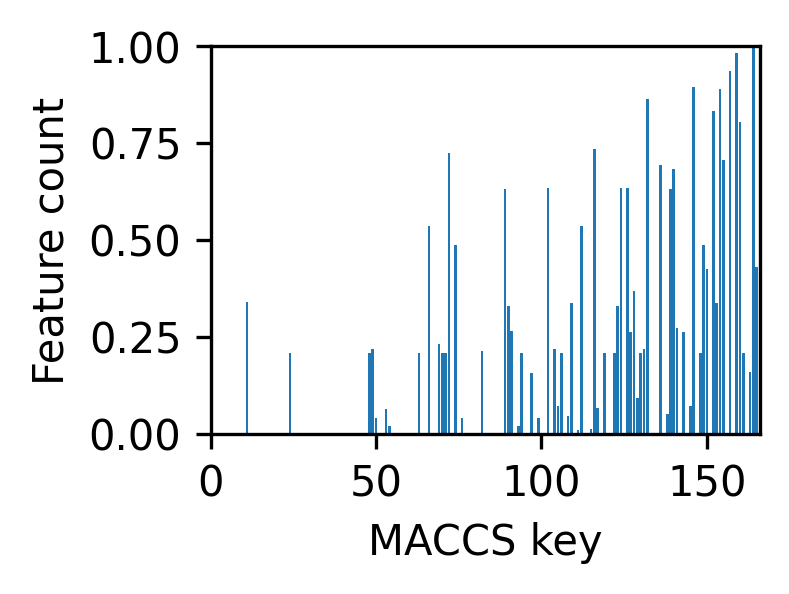

In [6]:
maccs_data.plot_feature_fp(feature_counts, '../reports/figures/test')

## Connect the MACCSkeys to the SMARTS patterns that they represent

In [7]:
nz_keys = pd.DataFrame(nz_features, columns=['in X percent of dataset'])
nz_keys.index.name = 'key'

In [8]:
key_def = pd.read_csv('../scripts/fps/explained_patterns.csv')
nz_keys['Explanation'] = key_def['Question'].iloc[nz_keys.index]

## Look at the keys which appear at least once in dataset

In [9]:
nz_keys

,in X percent of dataset,Explanation
key,,
11,0.341297,Does the molecule have a four-membered ring?
24,0.208191,Is there a single bond between a nitrogen and...
34,0.003413,Is there a doublebonded methylidene group?
48,0.208191,Is there a heteroatoms bonded to three oxygen...
49,0.218430,Does the molecule have atoms with a formal ch...
...,...,...
160,0.805461,Is there a methyl group?
161,0.208191,Is there a nitrogen atom?
163,0.160410,Is there a six membered ring?


## Look at the keys which never appear in dataset

In [10]:
unused_keys = pd.DataFrame(key_def['Question'].iloc[~nz_keys.index], columns=['Question'])
unused_keys.index.name = 'key'

In [11]:
unused_keys

,Question
key,
155,Is there a methylene bridge connected by to n...
142,Is there more than one nitrogen atom?
132,Is there an oxygen separated by one atom to ...
118,Are there more than one instance two methylen...
117,Is there a nitrogen and oxygen atom separated...
...,...
6,Does the molecule contain lanthanides?
5,Does the molecule contain atoms from group II...
3,"Are there atoms belonging to groups IVa, Va, ..."
